<h1>Car Price Prediction Multiple Linear Regression</h1>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn import preprocessing 
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler

In [24]:
orig = pd.read_csv("./archive/CarPrice_Assignment.csv")
df = pd.read_csv("./archive/CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


<h1>Data Cleaning</h1>

In [15]:
orig["CarName"].str.split(' ', expand=True)[0]
df["CarName"].str.split(' ',expand=True)[0]

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: 0, Length: 205, dtype: object

In [16]:
corrections = {
    'maxda' : 'mazda',
    'Nissan' : 'nissan',
    'porcshce' : 'porsche',
    'toyouta' : 'toyota',
    'vokswagen' : 'volkswagen',
    'vw' : 'volkswagen'
}

orig["CarName"].apply(lambda x : corrections.get(x,x))
df["CarName"].apply(lambda x : corrections.get(x,x))

0            alfa-romero giulia
1           alfa-romero stelvio
2      alfa-romero Quadrifoglio
3                   audi 100 ls
4                    audi 100ls
                 ...           
200             volvo 145e (sw)
201                 volvo 144ea
202                 volvo 244dl
203                   volvo 246
204                 volvo 264gl
Name: CarName, Length: 205, dtype: object

In [22]:
df.shape
df.describe().T


,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [28]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [31]:
df.duplicated().sum()

0

In [32]:
print("***CATEGORY COLUMNS***")
for cols in df.columns:
    
    if(df[cols].dtype == 'object'):
        print(cols)

***CATEGORY COLUMNS***
CarName
fueltype
aspiration
doornumber
carbody
drivewheel
enginelocation
enginetype
cylindernumber
fuelsystem


<h1>Feature Engineering And Scaling</h1>

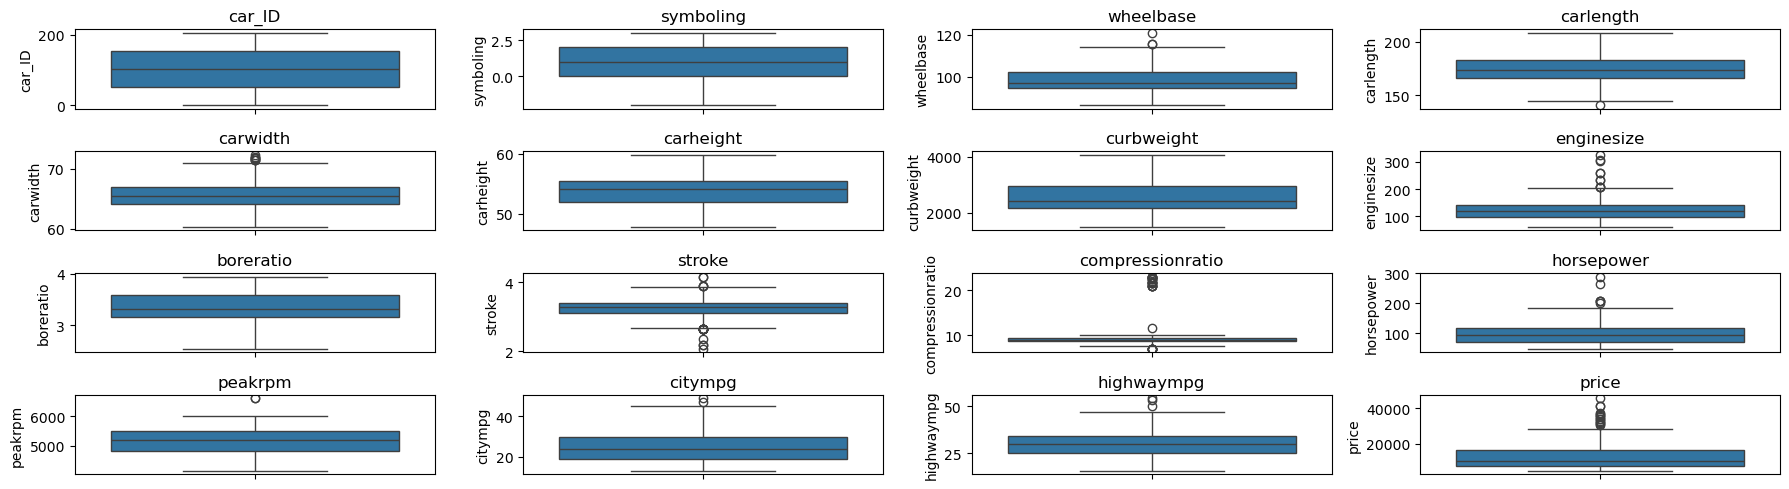

In [38]:
fig,axes = plt.subplots(4,4,figsize=(18,5))
nums_cols = df.select_dtypes(include=["float64","int64"]).columns
for i,cols in enumerate(nums_cols):
    row = i//4
    col_index = i%4
    sns.boxplot(y = df[cols],ax = axes[row,col_index])
    axes[row,col_index].set_title(cols)


plt.tight_layout()
plt.show()


In [53]:
convert = {'four' : 4,'six' : 6,'five' : 5,'eight' : 8,'two' : 2,'three' : 3,'twelve' : 12}
convert_door = {'four' : 4,'two' : 2}
df["cylindernumber"] =df["cylindernumber"].apply(lambda x : convert.get(x,x))
df["doornumber"] = df["doornumber"].apply(lambda x : convert_door.get(x,x))

In [54]:
df["car_vol"] = df["carheight"]*df["carlength"]*df["carwidth"]
df["avg_fuel"] = (df["citympg"] + df["highwaympg"])/2
df["torque"] = (df["horsepower"] * 5252) / df["peakrpm"]

In [56]:
df.columns.size

29

In [60]:
from sklearn.preprocessing import LabelEncoder
def convert_categorical_to_dummies(df):
    label_encoders = {}
    for column in df.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le# store encoder for potential inverse transformation
    
    return df,label_encoders
df_trans,encoders = convert_categorical_to_dummies(df)

df_trans.head()



,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_vol,avg_fuel,torque
0,1,3,2,1,0,2,0,2,0,88.6,...,2.68,9.0,111,5000,21,27,13495.0,528019.904,24.0,116.594400
1,2,3,3,1,0,2,0,2,0,88.6,...,2.68,9.0,111,5000,21,27,16500.0,528019.904,24.0,116.594400
2,3,1,1,1,0,2,2,2,0,94.5,...,3.47,9.0,154,5000,19,26,16500.0,587592.640,22.5,161.761600
3,4,2,4,1,0,4,3,1,0,99.8,...,3.40,10.0,102,5500,24,30,13950.0,634816.956,27.0,97.400727
4,5,2,5,1,0,4,3,0,0,99.4,...,3.40,8.0,115,5500,18,22,17450.0,636734.832,20.0,109.814545


In [62]:
df.drop(columns=["car_ID"],inplace = True)
df.drop(columns=['symboling','fueltype','aspiration','carbody','peakrpm'],inplace = True)
df.drop(columns=["carlength","carwidth","carheight","stroke","compressionratio"],inplace=True)

In [63]:
df_trans.corr()

,CarName,doornumber,drivewheel,enginelocation,wheelbase,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price,car_vol,avg_fuel,torque
CarName,1.000000,0.171745,-0.016129,0.055968,0.014550,-0.049407,-0.090381,-0.193771,-0.153982,0.123845,0.188598,-0.092131,0.093437,0.102895,-0.231439,0.067729,0.098999,-0.090173
doornumber,0.171745,1.000000,-0.098954,-0.137757,0.447357,0.197379,-0.062431,-0.016009,0.020742,-0.015519,0.119258,-0.126947,-0.012417,-0.036330,0.031835,0.473442,-0.024858,-0.065646
drivewheel,-0.016129,-0.098954,1.000000,0.147865,0.459745,0.575111,-0.116823,0.314006,0.524307,0.424686,0.481827,0.518686,-0.449581,-0.452220,0.577992,0.391977,-0.454198,0.542597
enginelocation,0.055968,-0.137757,0.147865,1.000000,-0.187790,0.050468,0.114127,0.183048,0.196826,0.105971,0.185042,0.317839,-0.153487,-0.102026,0.324973,-0.080295,-0.128017,0.234871
wheelbase,0.014550,0.447357,0.459745,-0.187790,1.000000,0.776386,-0.135577,0.339507,0.569329,0.384601,0.488750,0.353294,-0.470414,-0.544082,0.577816,0.913669,-0.511871,0.468170
curbweight,-0.049407,0.197379,0.575111,0.050468,0.776386,1.000000,-0.055265,0.609727,0.850594,0.611642,0.648480,0.750739,-0.757414,-0.797465,0.835305,0.819806,-0.783584,0.831832
enginetype,-0.090381,-0.062431,-0.116823,0.114127,-0.135577,-0.055265,1.000000,0.076788,0.040766,-0.091787,0.029355,0.010301,-0.085004,-0.078456,0.049171,-0.106432,-0.082237,0.012801
cylindernumber,-0.193771,-0.016009,0.314006,0.183048,0.339507,0.609727,0.076788,1.000000,0.846031,0.329387,0.231399,0.692016,-0.445837,-0.466666,0.718305,0.373232,-0.459823,0.733388
enginesize,-0.153982,0.020742,0.524307,0.196826,0.569329,0.850594,0.040766,0.846031,1.000000,0.514070,0.583774,0.809769,-0.653658,-0.677470,0.874145,0.594351,-0.670689,0.888772
fuelsystem,0.123845,-0.015519,0.424686,0.105971,0.384601,0.611642,-0.091787,0.329387,0.514070,1.000000,0.475599,0.655638,-0.671581,-0.645659,0.526823,0.446396,-0.663053,0.651510


In [67]:
df_trans.shape

(205, 18)

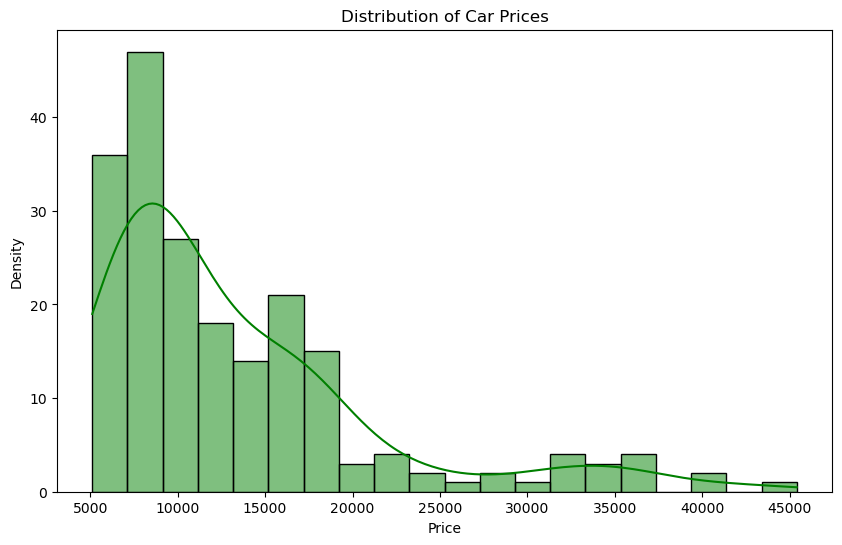

In [65]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=20, color='green')
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()


In [66]:
X = df_trans.drop("price",axis=1)
y = df_trans["price"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=101)

print("X_train : ",X_train.shape)
print("X_test : ",X_test.shape)
print("Y_train : ",y_train.shape)
print("Y_test : ",y_test.shape)

X_train :  (153, 17)
X_test :  (52, 17)
Y_train :  (153,)
Y_test :  (52,)


In [68]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
print(f"Mean Squared Error: {mse}")
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")
r2 = r2_score(y_test,y_pred) * 100
print(f"R2 Score: {r2}")

Mean Squared Error: 12691056.650027428
Root Mean Squared Error: 3562.4509329992784
R2 Score: 82.11767206804643


In [69]:
scaler = StandardScaler()

A = df_trans.drop("price",axis=1)
b = df_trans["price"]
A = scaler.fit_transform(A)
A[:5]

array([[-1.83822103, -1.13038833,  1.21333041, -0.12186667, -1.6907718 ,
        -0.01456628, -2.86510549, -0.35288699,  0.07444893,  0.8695675 ,
         0.51907138,  0.17448278, -0.64655303, -0.54605874, -1.14419531,
        -0.59932483,  0.23640253],
       [-1.81377978, -1.13038833,  1.21333041, -0.12186667, -1.6907718 ,
        -0.01456628, -2.86510549, -0.35288699,  0.07444893,  0.8695675 ,
         0.51907138,  0.17448278, -0.64655303, -0.54605874, -1.14419531,
        -0.59932483,  0.23640253],
       [-1.86266229, -1.13038833,  1.21333041, -0.12186667, -0.70859588,
         0.51488192,  1.88688986,  1.50203181,  0.60404617,  0.8695675 ,
        -2.40488029,  1.26453643, -0.95301169, -0.69162706, -0.39267042,
        -0.82489691,  1.36498527],
       [-1.78933852,  0.88465174, -0.58908071, -0.12186667,  0.17369775,
        -0.42079745, -0.01390828, -0.35288699, -0.43107572,  0.8695675 ,
        -0.51726592, -0.05366798, -0.18686504, -0.10935377,  0.20307608,
        -0.14818068

In [70]:
X_train_s,X_test_s,y_train_s,y_test_s = train_test_split(A,b,test_size = 0.30,random_state=42)
print("X_train_scaler : ",X_train_s.shape)
print("X_test_scaler : ",X_test_s.shape)
print("Y_train_scaler : ",y_train_s.shape)
print("Y_test_scaler : ",y_test_s.shape)

X_train_scaler :  (143, 17)
X_test_scaler :  (62, 17)
Y_train_scaler :  (143,)
Y_test_scaler :  (62,)


In [71]:
model.fit(X_train_s,y_train_s)
y_pred = model.predict(X_test_s)


mse = mean_squared_error(y_test_s,y_pred)
print(f"Mean Squared Error: {mse}")
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")
r2 = r2_score(y_test_s,y_pred) * 100
print(f"R2 Score: {r2}")

Mean Squared Error: 8567949.492193712
Root Mean Squared Error: 2927.105992647638
R2 Score: 87.63364893511636
